# Least Action and Lagrangian Mechanics

<span style="color: red">Note</span>:
This web page is a jupyter notebook. It is a document that has both computer code and text in the same web page. You should notice that you can click on text and a blue box will show up around part of the page. That is one *cell* in the notebook. If you double click you can see the raw text. To go back to the typeset display, type `<shift><enter>` in that cell.
    
Go ahead and try this on this cell.


Some of the cells in the notebook are computer code. I use the python language. In those cells press `<shift><enter>` to run the computer code. 
    
Go ahead and try this on the python computer code below.

In [ ]:
print("Hello, world!")

# Introduction to Least Action and Lagrangian Mechanics

First of all, Lagrangian mechanics was invented as just a way of formulating and solving Newton's Law. It uses the concepts of kinetic and potential energy. You can solve some systems way easier using the Lagrangian formulation than if you directly used Newton's Laws. Later physicists discovered that the heart of the Lagrangian formulation, *Least Action*, could be applied to relativistic mechanics and, as Feynman discovered, quantum mechanics.

Classic Lagrangian mechanics starts by defining the *Lagrangian*, *L* as 
$$
L = T - V,
$$
where $T$ is the kinetic energy of the system and $V$ is the potential energy. For an example I will use the case of the one-dimensional pendulum. One of the great advantages of the Lagrangian formulation, is that you can use any convenient coordinates to describe your system. You do not have to use Cartesian x, y, coordinates. For the pendulum, I will use the angle from the vertical, $\theta$.


![Pendulum](Simple_gravity_pendulum.svg)
*Figure 1 - The simple pendulum. The only coordinate is $\theta$, the angle from the vertical.*



Let's start with finding the equilibrium position of the pendulum. For an object near the surface of the Earth, the potential energy, $V(h)$ is 
$$
V(h) = mgh + V_0, 
$$
where $m$ is the mass of the bob, $g$ is the gravitational field strength (about 9.8 $m/s^2$), $h$ is height of the object, and $V_0$ is an arbitrary additive constant energy. It is convenient to choose $V_0 = 0$ when the pendulum is hanging straight down, then $h$ is the height above the bottom of the swing. Now you need some trigonometry to figure out the potential energy as a function of $\theta$. The next figure shows how to do that.

![Pendulum](Pendulum_v.svg)
*Figure 2 - The length of the rod is $L$ and $h$ is the small vertical distance from the center of the bob to the red arc. The adjacent side of the triangle is $L cos(\theta)$. So $L = L cos(\theta) + h$. Then $h = L (1 - cos(\theta))$.*


From *Figure 2*, $h$ is the vertical height of the bob, so the potential energy is
$$V(\theta) = mgh.$$
So
$$V(\theta) = mg (1 - cos(\theta)).$$

Now we can introduced a case of minimizing a function. The equilibrium position of the pendulum is when the potential energy function is at a minimum. 

# Finding the Minimum Numerically
Usually there are several ways to solve a problem. One way of finding a minimum is to find the value of the function, then use "guess and check" until you find the smallest function value you can.

**Angles** in algebra are naturally measures in *radians* than degrees. In radian measure zero is still zero, but 90 degrees is $\pi/2$, or about 1.57, radians and 180 degrees is $\pi$ radians. I will measure angle in radians.

In the cell below I programmed the potential energy function. Run the cell by clicking on the cell and typing `<shift><Enter>`. Explore entering numbers and look at the value of the function. Don't forget to try negative numbers. To stop type any letter.

In [1]:
m = 1.0 # kg
L = 1.0 # meters
g = 9.8 # gravity in m/s^2
import numpy as np

def V(theta):
    return m * g * (1.0 - np.cos(theta))

n = 0
try:
    while True:
        if n % 3 == 0:
            print("### Enter a letter to stop")
        theta = float(input("Enter an angle theta in radians: "))
        print(f"Potential energy is {V(theta):.6f} J")
        n += 1
except:
    pass

### Enter a letter to stop
Enter an angle theta in radians: a


# Finding the Minimum Graphically
Another way to find a minumum is to graph the function and find the lowest point. Below is code to plot the graph of the potential energy. Run the cell by typing `<shift><enter`. From the graph you can *see* the minimum of the potential energy. Does it agree with your numerical tries above? It should!

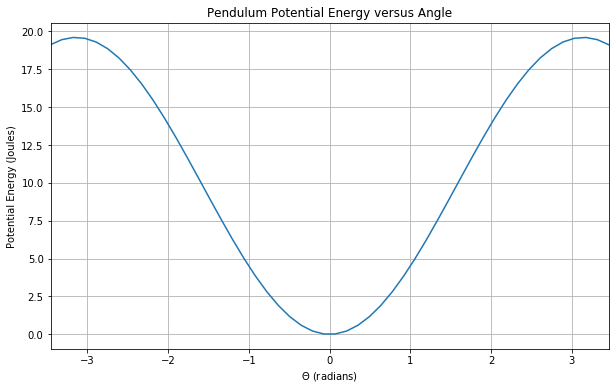

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
th = np.linspace(-1.1*np.pi,1.1*np.pi)
ax.plot(th, V(th))
ax.grid()
ax.set_title("Pendulum Potential Energy versus Angle")
ax.set_xlim(-1.1*np.pi,1.1*np.pi)
ax.set_xlabel("$\Theta$ (radians)")
a = ax.set_ylabel("Potential Energy (Joules)")


You can see the potential energy has a minimum, then goes up to a maximum and starts down again. Actually this is just a cosine function, so it actually has an infinite number of minimum values from -$\infty$ to +$\infty$. That is a story for another day. For now, we will stay between $\pm 180^o$.

# Finding the Minimum by a Tangent
Another way to find the minimum of a function is to find the tangent line to the function point. Where the tangent is horizontal, the function is either a minimum of a maximum. Run the cell below and slide the value of $\theta$ and watch the tangent line. 

In [4]:
from ipywidgets import interact, FloatSlider

def derivV(th1):
    return m * g * L * np.sin(th1)

G_th = np.linspace(-1.1*np.pi,1.1*np.pi)

def plotTangent(theta=-np.pi/4):
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    # Draw lens 1
    ax.plot(G_th, V(G_th))
    
    # Plot tangent line
    deriv = derivV(theta)
    V0 = V(theta)
    ax.plot(G_th, deriv * (G_th - theta) + V0)
    ax.text(-3,21, f"V({theta:.4f}) = {V(theta):.5f}")
    
    #
    ax.set_xlim(-1.1*np.pi,1.1*np.pi)
    ax.set_xlabel("$\Theta$ (radians)")
    ax.set_ylim(-1,25)
    ax.set_ylabel("Potenial Energy (Joules)")
    ax.grid()

    plt.show()

interact(plotTangent, \
         theta=FloatSlider(default=-1.57, min=-3.5, max=3.5, step=0.05, continuous_update=False));


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='theta', max=3.5, min=-3.5, …

You can click and move the slider or click on the number and enter an exact number.

# Finding the Minimum with Calculus
One of the basic results of calculus is an operation called a *derivative*. A derivative is a new function that is the slope, or tangent, of a function at every point. In the code above I programmed the derivative of the potential energy funtion. From calculus, the derivative of the potential energy with respect to the angle $\theta$ is written as $\frac{d V}{d \theta}$. In this case it is
$$
\frac{d V}{d \theta} = m g L sin(\theta)
$$

As you could see above, findinf the minimum of the potential energy is the same as solving for when the derivative of the potential energy is zero. 
It is almost always easier to find where the derivative is zero than where a function has 
a minimum.

$$
m g L sin(\theta) = 0
$$

For our pendulum this is whenever the angle $theta$ is -$\pi$, 0, $\pi$, 2$\pi$, etc. 

In other words, the equilibrium position of the pendulum is hanging straight down. Duh. But at least the math agrees with reality which agrees with common sense.

By the way, the derivative is not plotted as a tangent line, but just the value of the slope of the tangent line is plotted. For our pendulum, run the cell below to see a plot of the derivative of the portential energy.

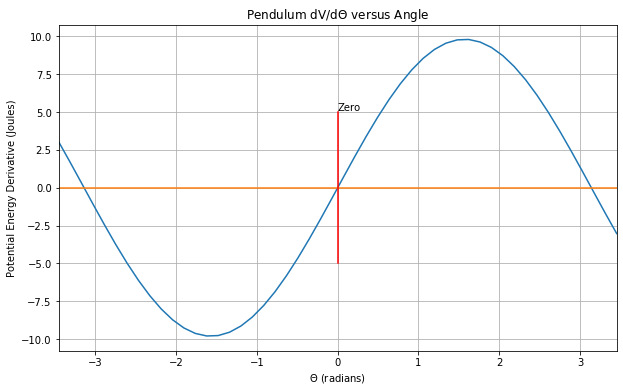

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
th = np.linspace(-1.1*np.pi,1.1*np.pi)
ax.plot(th, derivV(th))
ax.plot(th, np.zeros_like(th))
ax.plot((0,0),(-5,5), 'r')
ax.text(0,5.1, 'Zero')
ax.grid()
ax.set_title("Pendulum dV/d$\Theta$ versus Angle")
ax.set_xlim(-1.1*np.pi,1.1*np.pi)
ax.set_xlabel("$\Theta$ (radians)")
a = ax.set_ylabel("Potential Energy Derivative (Joules)")

# The Next Step
What is next is what happens when the pendulum is moving. We will eventually see the story of the motion comes down to finding the much more complicated minimum of a much more complicated function. But, we have a start to the problem.